In [15]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv('/content/drive/MyDrive/Machine learning/kmean for big data/skin_nonskin.csv')
x = df.iloc[ : , :-1]
y = df.iloc[ : , -1]
print(x.head())

    b   g    r
0  74  85  123
1  73  84  122
2  72  83  121
3  70  81  119
4  70  81  119


In [16]:
def euclidean_distance(a, b):
    return sum((x - y)**2 for x, y in zip(a, b))

def kmeans_plusplus(data, k, prev_cens):
    n=len(prev_cens)
    s=0
    if n==0:
        centers = []
        center = random.choice(data)
        centers.append(center)
        s=1
    else:
        centers=prev_cens
        s=n
    for _ in range(s, k):
        distances = []
        for point in data:
            min_distance = float("inf")
            for center in centers:
                distance = euclidean_distance(point, center)
                min_distance = min(min_distance, distance)
            distances.append(min_distance**(1/2))
        total_distance = sum(distances)
        probabilities = [distance / total_distance for distance in distances]
        chosen_index = random.choices(range(len(data)), weights=probabilities)[0]
        center = data[chosen_index]
        centers.append(center)
    return centers



In [17]:
def bigmeans(df,no_of_sample, k):
    n = df.shape[0]
    new_cluster= []
    results={}
    i=0
    min_error = np.inf
    min_error_centroid = None
    while(i<no_of_sample):
        sample = np.random.choice(n,size=int(8000))
        x = df.loc[sample]
        x = x.values.tolist()
        new_cluster = kmeans_plusplus(x, k, new_cluster)
        kmeans = KMeans(n_clusters=k, init = new_cluster)
        kmeans.fit(x)
        centroids = kmeans.cluster_centers_
        error = kmeans.inertia_
        if error < min_error:
            min_error = error
            min_error_centroid = centroids
            new_cluster = min_error_centroid
        i+=1

    return min_error, min_error_centroid

In [18]:
e,c=bigmeans(x, 30, 2)
print(e/(10**9))
print(c)

0.04176511960731033
[[158.87441357 166.44171779 156.39498376]
 [ 52.44304312  60.04027665  47.61594793]]


In [19]:
result = {}
result['2'] = bigmeans(x, 30, 2)[0]/(10**9)
result['3'] = bigmeans(x, 30, 3)[0]/(10**9)
result['5'] = bigmeans(x, 30, 5)[0]/(10**9)
result['10'] = bigmeans(x, 30, 10)[0]/(10**9)
result['15'] = bigmeans(x, 30, 15)[0]/(10**9)
result['20'] = bigmeans(x, 30, 20)[0]/(10**9)
result['25'] = bigmeans(x, 30, 25)[0]/(10**9)

In [20]:
print('No. of cluster     ', 'SSE')
for key, value in result.items():
    print(key, '            ',value)

No. of cluster      SSE
2              0.04221197829346041
3              0.02834963249259147
5              0.016240335147986625
10              0.008090008385597239
15              0.00665062860477666
20              0.004166295316460869
25              0.0034344157064171254


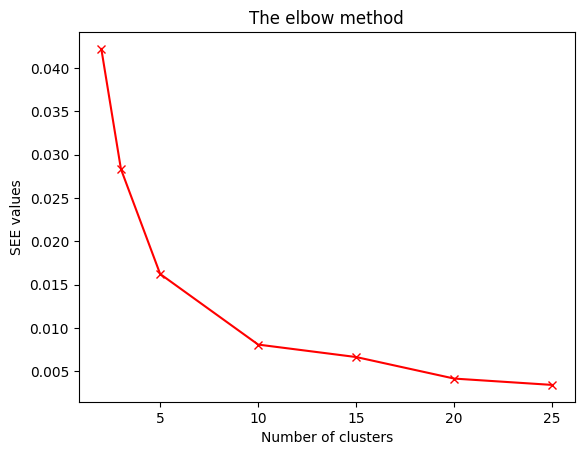

In [21]:
no_of_sample = 30
dfe = []
sse=[]
for key, value in result.items():
    dfe.append(int(key))
    sse.append(value)

plt.plot(dfe, sse, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SEE values')
plt.show()